In [44]:
import matplotlib.pyplot as plt
import numpy as np

from lacbox.io import load_cmb

import scienceplots
# matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])



# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'normal'

# Load HAWCStab2

In [45]:
TURBINE_NAME = 'Breeze Boss 10 MW'
CMB_PATH = '../campbell/part_2.cmb'

NMODES = 8  # number of modes to plot
MODE_NAMES = ['Tower for-aft', 'Tower side-side', '1st flap BW', '1st flap FW', '1st flap sym',
              '1st edgewise BW', '1st edgwise FW', '2nd flapwise BW', '2nd flapwise FW', '2nd flapwise sym',
              '1st edgewise sym']
OPT_PATH = None  # path to opt file, needed for P-harmonics

# load campbell diagram
wsp, dfreqs, zetas = load_cmb(CMB_PATH, cmb_type='aeroelastic')

# Load P-Frequencies


In [46]:
data_path = np.loadtxt("..\data\BB_redesign_compute_flex_opt.opt", skiprows=1)

wind_speed = data_path[:,0]
data_x = data_path[:,2]


data_1p = data_x/60
data_3p = data_x/60 * 3
data_6p = data_x/60 *6


# Plots

In [47]:
# Assign colors to mode categories
tower_color = 'tab:blue'       # Color for tower modes
flapwise_1st_color = 'tab:orange'   # Color for 1st flapwise modes
flapwise_2nd_color = 'tab:red'  # Color for 2nd flapwise modes
edgewise_color = 'tab:green'     # Color for edgewise modes

# Define markers based on specific rules
tower_markers = ['x', 'x']  # Tower modes use 'x' for both
flapwise_markers = ['<', '>', 'o', '<', '>', 'o']  # < for backwards, > for fore-aft, 'o' for symmetric
edgewise_markers = ['<', '>', 'o']  # Edgewise modes markers

# Categorize modes based on their type (tower, flapwise, edgewise)
tower_modes = [0, 1]  # Indexes for tower modes
flapwise_1st_modes = [2, 3, 4]  # Indexes for 1st flapwise modes
flapwise_2nd_modes = [7, 8, 9]  # Indexes for 2nd flapwise modes
edgewise_modes = [5, 6, 10]  # Indexes for edgewise modes

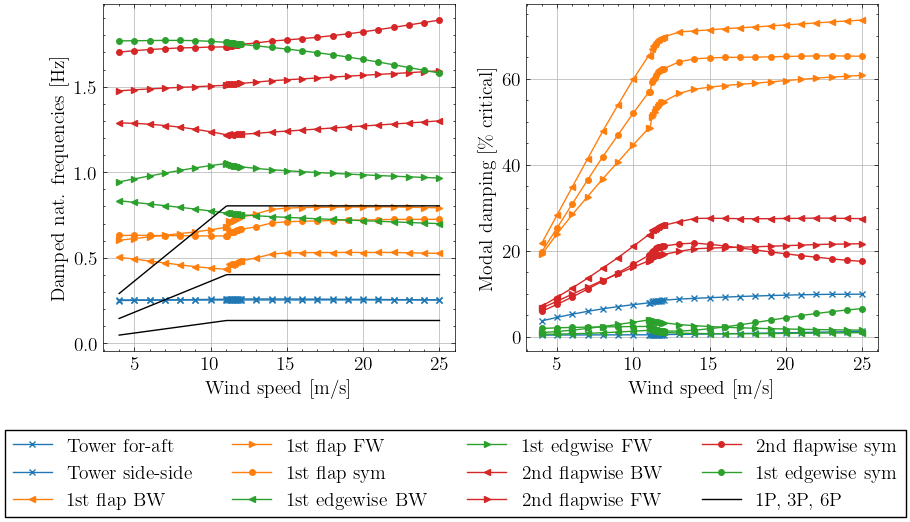

In [52]:
# initialize plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5))

# loop through modes
NMODES = len(MODE_NAMES)
for i in range(NMODES):
    # Assign color and marker based on mode type
    if i in tower_modes:
        color = tower_color
        marker = tower_markers[tower_modes.index(i)]  # Get the marker for tower modes
    elif i in flapwise_1st_modes:
        color = flapwise_1st_color
        marker = flapwise_markers[flapwise_1st_modes.index(i)]  # Get the marker for 1st flapwise modes
    elif i in flapwise_2nd_modes:
        color = flapwise_2nd_color
        marker = flapwise_markers[flapwise_2nd_modes.index(i)]  # Get the marker for 2nd flapwise modes
    elif i in edgewise_modes:
        color = edgewise_color
        marker = edgewise_markers[edgewise_modes.index(i)]  # Get the marker for edgewise modes

    # left plot: damped nat freqs in ground-fixed frame
    axs[0].plot(wsp, dfreqs[:, i], marker=marker, markersize=4, c=color, label=MODE_NAMES[i])

    # right plot: percent criticl damping
    axs[1].plot(wsp, zetas[:, i], marker=marker, markersize=4, c=color)
    

axs[0].plot(wind_speed, data_1p, color='k', label='1P, 3P, 6P')
axs[0].plot(wind_speed, data_3p, color='k')
axs[0].plot(wind_speed, data_6p, color='k')


# prettify
axs[0].set(xlabel='Wind speed [m/s]', ylabel='Damped nat. frequencies [Hz]')
axs[0].grid()
axs[1].set(xlabel='Wind speed [m/s]', ylabel='Modal damping [$\%$ critical]')
axs[1].grid()
axs[0].legend(loc='upper center', bbox_to_anchor=(1, -0.2), ncol=4)
# axs[1].legend(loc='upper center', bbox_to_anchor=(1, -0.2), ncol=4) 
 

# fig.tight_layout()
plt.savefig('aeroelastic_campbell.pdf', dpi=300)

# plt.show()
